In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import os
from datetime import datetime
from wordcloud import WordCloud, STOPWORDS
from IPython.display import display
from matplotlib import rcParams
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

In [3]:
path = './data'
songs = pd.read_csv(path+'/songs_final.csv')

display(songs.info())
display(songs.describe().T)
songs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4800 entries, 0 to 4799
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             4800 non-null   object 
 1   primary_artist    4800 non-null   object 
 2   danceability      4800 non-null   float64
 3   energy            4800 non-null   float64
 4   key               4800 non-null   int64  
 5   loudness          4800 non-null   float64
 6   mode              4800 non-null   int64  
 7   speechiness       4800 non-null   float64
 8   acousticness      4800 non-null   float64
 9   instrumentalness  4800 non-null   float64
 10  liveness          4800 non-null   float64
 11  valence           4800 non-null   float64
 12  tempo             4800 non-null   float64
 13  time_signature    4800 non-null   int64  
 14  duration_s        4800 non-null   int64  
 15  year              4800 non-null   int64  
 16  genres            4800 non-null   object 


None

,count,mean,std,min,25%,50%,75%,max
danceability,4800.0,0.630908,0.147346,0.135000,0.539000,0.644000,0.734000,0.980
energy,4800.0,0.663262,0.189208,0.026400,0.534750,0.686000,0.817000,0.996
key,4800.0,5.306875,3.603180,0.000000,2.000000,5.000000,9.000000,11.000
loudness,4800.0,-7.941893,3.454099,-24.709000,-10.088500,-7.247000,-5.304500,-0.140
mode,4800.0,0.662500,0.472906,0.000000,0.000000,1.000000,1.000000,1.000
speechiness,4800.0,0.071971,0.075093,0.022500,0.032700,0.043100,0.071825,0.911
acousticness,4800.0,0.199933,0.226299,0.000005,0.026075,0.106000,0.305000,0.978
instrumentalness,4800.0,0.028952,0.118180,0.000000,0.000000,0.000009,0.000961,0.985
liveness,4800.0,0.173598,0.141214,0.015000,0.083575,0.119000,0.223000,0.989
valence,4800.0,0.597184,0.240588,0.038100,0.410000,0.615500,0.800000,0.989


,title,primary_artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_s,year,genres,lyrics
0,Let It Be - Remastered 2009,The Beatles,0.443,0.403,0,-8.339,1,0.0322,0.6310,0.000000,0.1110,0.4100,143.462,4,243,1970,['rock'],When I find myself in times of trouble Mother ...
1,Cecilia,Simon & Garfunkel,0.755,0.876,0,-8.867,1,0.0362,0.3570,0.000005,0.2200,0.9540,102.762,4,175,1970,"['folk', 'rock']",Cilia youre breaking my heart. Youre shaking m...
2,Son of a Preacher Man,Aretha Franklin,0.474,0.473,2,-11.454,1,0.0601,0.5450,0.000001,0.0356,0.5610,77.583,4,199,1970,"['blues', 'soul']",Billy Ray was a preachers son. And when his da...
3,Who'll Stop The Rain,Creedence Clearwater Revival,0.598,0.797,7,-6.793,1,0.0332,0.0424,0.000407,0.0717,0.6220,123.566,4,147,1970,['rock'],Long as I remember the rain been coming down. ...
4,Big Yellow Taxi,Joni Mitchell,0.611,0.470,4,-9.135,1,0.0356,0.5790,0.000000,0.5810,0.9700,85.527,4,135,1970,"['folk', 'rock']",They paved paradise and put up a parking lot. ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,Ladbroke Grove,AJ Tracey,0.902,0.839,11,-9.447,0,0.2080,0.0933,0.000000,0.1020,0.7270,133.989,4,191,2019,"['dance/electronic', 'hip hop', 'rock']",No one sees. No one. One. No one sees. No one ...
4796,Slide Away,Miley Cyrus,0.530,0.538,5,-6.672,1,0.0335,0.1700,0.000003,0.2480,0.2880,148.051,4,234,2019,['pop'],Wooooh wooooh wooooh. Wooooh wooooh wooooh. On...
4797,The Git Up,Blanco Brown,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.8110,97.984,4,201,2019,['rap'],Right now. I just need you to get real loose. ...
4798,Easier,5 Seconds of Summer,0.562,0.460,5,-4.173,1,0.2590,0.4760,0.000000,0.1070,0.6230,176.055,4,158,2019,['pop'],Is it easier to stay Is it easier to go. I don...


In [5]:
# Reformat 'mode' and 'key' columns
songs.drop_duplicates()
songs['mode'].replace({1: 'Major', 0: 'minor'}, inplace=True)
key_dict = { 0: 'C', 1: 'C♯/D♭', 2: 'D', 3: 'D♯/E♭',
             4: 'E', 5: 'F', 6: 'F♯/G♭', 7: 'G',
             8: 'G♯/A♭', 9: 'A', 10: 'A♯/B♭', 11: 'B',
             -1: 'Unknown'
           }
songs['key'].replace(key_dict, inplace=True)

songs

,title,primary_artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_s,year,genres,lyrics
0,Let It Be - Remastered 2009,The Beatles,0.443,0.403,C,-8.339,Major,0.0322,0.6310,0.000000,0.1110,0.4100,143.462,4,243,1970,['rock'],When I find myself in times of trouble Mother ...
1,Cecilia,Simon & Garfunkel,0.755,0.876,C,-8.867,Major,0.0362,0.3570,0.000005,0.2200,0.9540,102.762,4,175,1970,"['folk', 'rock']",Cilia youre breaking my heart. Youre shaking m...
2,Son of a Preacher Man,Aretha Franklin,0.474,0.473,D,-11.454,Major,0.0601,0.5450,0.000001,0.0356,0.5610,77.583,4,199,1970,"['blues', 'soul']",Billy Ray was a preachers son. And when his da...
3,Who'll Stop The Rain,Creedence Clearwater Revival,0.598,0.797,G,-6.793,Major,0.0332,0.0424,0.000407,0.0717,0.6220,123.566,4,147,1970,['rock'],Long as I remember the rain been coming down. ...
4,Big Yellow Taxi,Joni Mitchell,0.611,0.470,E,-9.135,Major,0.0356,0.5790,0.000000,0.5810,0.9700,85.527,4,135,1970,"['folk', 'rock']",They paved paradise and put up a parking lot. ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,Ladbroke Grove,AJ Tracey,0.902,0.839,B,-9.447,minor,0.2080,0.0933,0.000000,0.1020,0.7270,133.989,4,191,2019,"['dance/electronic', 'hip hop', 'rock']",No one sees. No one. One. No one sees. No one ...
4796,Slide Away,Miley Cyrus,0.530,0.538,F,-6.672,Major,0.0335,0.1700,0.000003,0.2480,0.2880,148.051,4,234,2019,['pop'],Wooooh wooooh wooooh. Wooooh wooooh wooooh. On...
4797,The Git Up,Blanco Brown,0.847,0.678,A,-8.635,Major,0.1090,0.0669,0.000000,0.2740,0.8110,97.984,4,201,2019,['rap'],Right now. I just need you to get real loose. ...
4798,Easier,5 Seconds of Summer,0.562,0.460,F,-4.173,Major,0.2590,0.4760,0.000000,0.1070,0.6230,176.055,4,158,2019,['pop'],Is it easier to stay Is it easier to go. I don...


In [7]:
# Descending counts of keys
print('Common keys: \n', songs['key'].value_counts().sort_values(ascending=False), '\n')

# Descending counts of appearances of artists
artists = songs['primary_artist'].value_counts().sort_values(ascending=False)
artists.columns = ['artist', 'appearances']
print('Common artists: \n', artists)

Common keys: 
 C        576
G        504
A        489
C♯/D♭    481
D        452
F        419
B        405
E        376
A♯/B♭    322
G♯/A♭    320
F♯/G♭    319
D♯/E♭    137
Name: key, dtype: int64 

Common artists: 
 Michael Jackson    29
Madonna            28
Rihanna            28
Elton John         27
Drake              24
                   ..
Travie McCoy        1
Iyaz                1
Don Omar            1
Stromae             1
Freya Ridings       1
Name: primary_artist, Length: 1897, dtype: int64


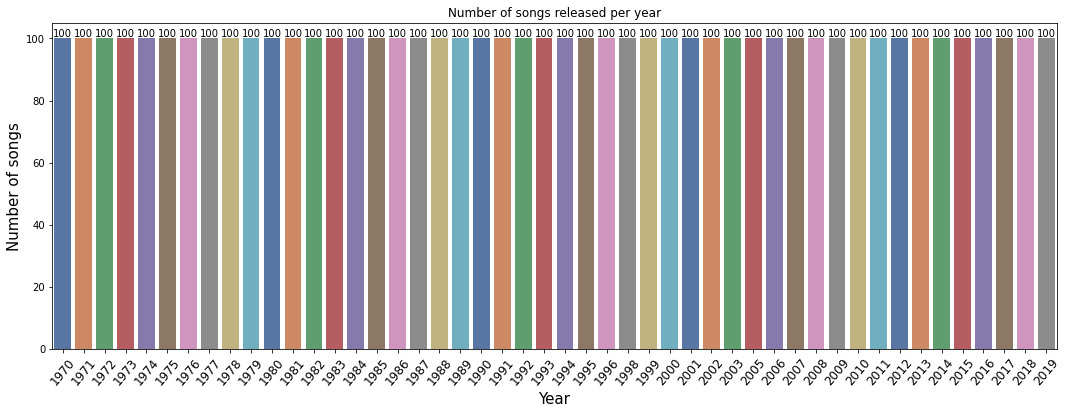

In [8]:
songs_per_year = (songs.year.value_counts().rename_axis('year').reset_index(name='songs'))

plt.figure(figsize=(18,6))
ax = sns.barplot(x = 'year', y = 'songs', data = songs_per_year,palette='deep')
plt.ylabel('Number of songs', size = 15)
plt.xlabel('Year', size = 15)
plt.title('Number of songs released per year')
plt.xticks(fontsize=12, rotation = 50)
ax.bar_label(ax.containers[0],size = 10)
plt.show()

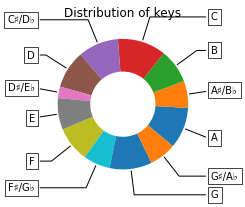

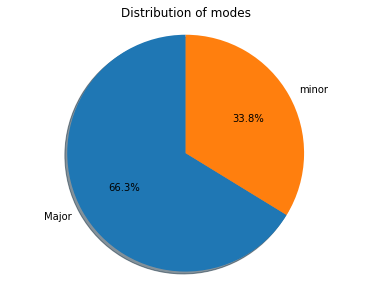

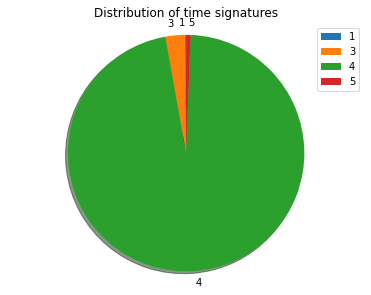

In [9]:
# Some pie charts showing the distrubution of key, mode and time signature
ig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))
key_labels = sorted(songs['key'].unique())
key_sizes = songs['key'].value_counts().sort_index().to_list()
wedges, texts = ax.pie(key_sizes, wedgeprops=dict(width=0.5), startangle=-40)
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(key_labels[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Distribution of keys")
plt.show()


mode_sizes = songs['mode'].value_counts().sort_index().to_list()
mode_labels = sorted(songs['mode'].unique())
explode = (0, 0)
fig2, ax2 = plt.subplots()
ax2.pie(mode_sizes, explode=explode, labels=mode_labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax2.axis('equal') 
ax2.set_title("Distribution of modes")
plt.show()

time_sizes = songs['time_signature'].value_counts().sort_index().to_list()
time_labels = sorted(songs['time_signature'].unique())
explode = (0, 0, 0, 0)
fig3, ax3 = plt.subplots()
ax3.pie(time_sizes, explode=explode, labels=time_labels, shadow=True, startangle=90)
ax3.axis('equal') 
ax3.set_title("Distribution of time signatures")
plt.legend()
plt.show()

Ascending average tempo by artist:
                   tempo
primary_artist          
MoKenStef         64.979
Freya Ridings     67.016
Bobby McFerrin    68.837
Tom Walker        68.976
Jeffrey Osborne   69.199
...                  ...
Steve Perry      203.753
Blake Shelton    205.570
Carole King      208.282
John Waite       208.571
The Nolans       210.654

[1897 rows x 1 columns]


<AxesSubplot:title={'center':'Average speechiness changes over year'}, xlabel='year'>

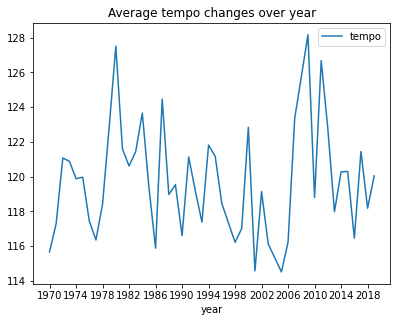

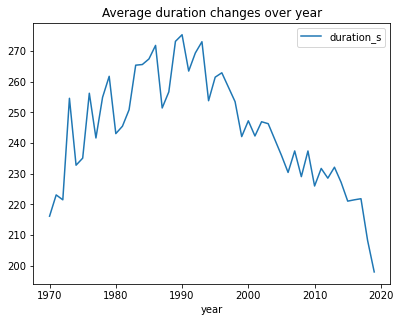

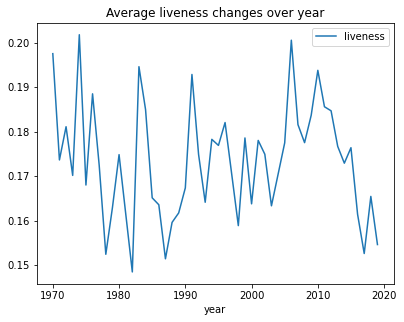

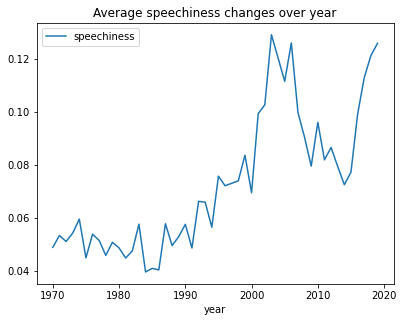

In [12]:
def get_average_x_by_y(x, y, sort):
    if (sort==True):
        return (songs.groupby([y]).agg({str(x):'mean'})).sort_values(x)
    return (songs.groupby([y]).agg({str(x):'mean'}))

print('Ascending average tempo by artist:')
print(get_average_x_by_y('tempo', 'primary_artist', True))

tempo_by_years = get_average_x_by_y('tempo', 'year', False)
tempo_by_years.plot(title="Average tempo changes over year", xticks=range(1970, 2020, 4))

duration_by_years = get_average_x_by_y('duration_s', 'year', False)
duration_by_years.plot(title="Average duration changes over year")

liveness_by_years = get_average_x_by_y('liveness', 'year', False)
liveness_by_years.plot(title="Average liveness changes over year")

speechiness_by_years = get_average_x_by_y('speechiness', 'year', False)
speechiness_by_years.plot(title="Average speechiness changes over year")


<AxesSubplot:>

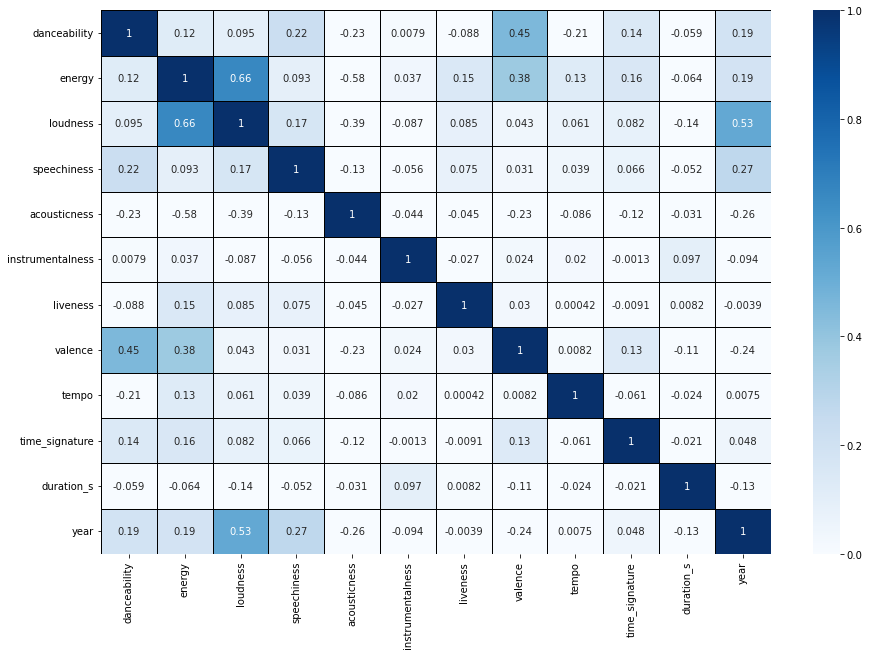

In [13]:
# Correlation between features
features = songs.drop(["primary_artist", "title"], axis=1)
corr = features.corr()
fig, ax = plt.subplots(figsize=(15,10))         
sns.heatmap(corr, vmin=0, vmax=1, cmap="Blues", cbar=True, linewidths=1, linecolor='black', annot=True)

# The heatmap indicates that there is not many strong correlation between the metrics

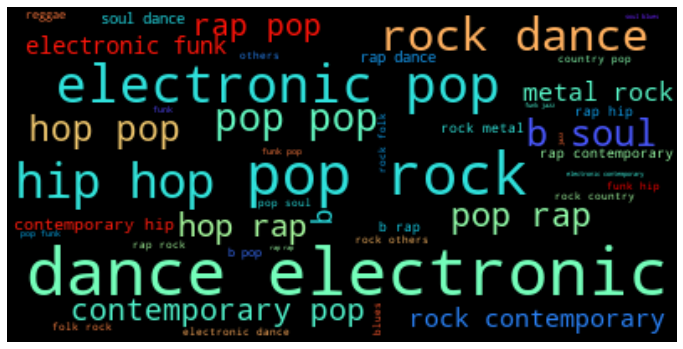

In [14]:
# Reformat the genres column
import ast
import itertools

genres_list = []
for entry in songs['genres']:
    new_entry = [n.strip() for n in ast.literal_eval(entry)]
    genres_list.append(new_entry)
    
joined_list = list(itertools.chain.from_iterable(genres_list))

# Genres wordcloud
genres = ' '.join(joined_list)
rcParams['figure.figsize'] = (12,8)
wordcloud = WordCloud(stopwords = STOPWORDS, collocations=True, 
                      background_color='black', colormap='rainbow',
                     max_words=200, max_font_size=40).generate(genres)
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

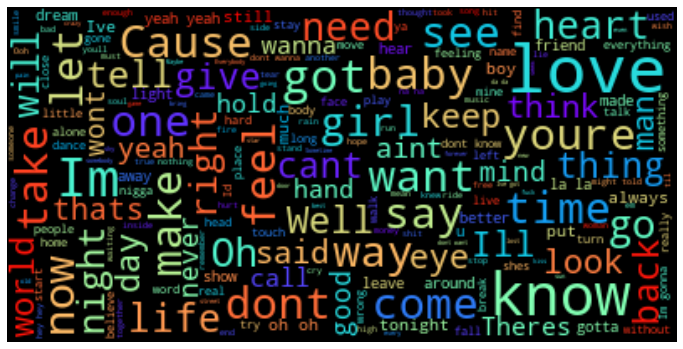

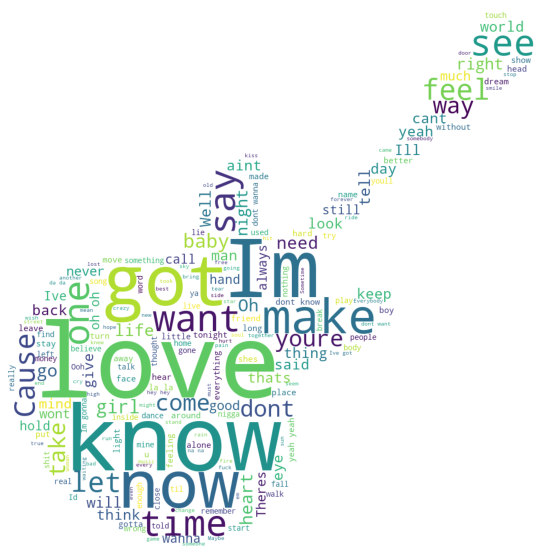

In [16]:
# Lyrics wordcloud
lyrics_list = songs['lyrics'].to_list()
lyrics_words = " ".join(map(str,lyrics_list))
rcParams['figure.figsize'] = (12,8)
wordcloud = WordCloud(stopwords = STOPWORDS, collocations=True, 
                      background_color='black', colormap='rainbow',
                     max_words=200, max_font_size=40).generate(lyrics_words)
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

from PIL import Image
mask = np.array(Image.open('./mask_guitar.png'))
wordcloud = WordCloud(background_color='white', max_words=200,
                     mask=mask).generate(lyrics_words)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [16]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from textblob import TextBlob
from textblob import Blobber
from textblob.sentiments import NaiveBayesAnalyzer

sia = SIA()
blobber = Blobber(analyzer=NaiveBayesAnalyzer())

def get_sentiment_scores(content):
    sia_scores = sia.polarity_scores(content)
    
    return pd.Series({
        'content': content,
        'nltk': sia_scores['compound'],
})

for idx, lyrics in enumerate(songs['lyrics']):
    if type(lyrics) is not float:            
        scores = get_sentiment_scores(lyrics)
        songs.at[idx, 'nltk'] = scores['nltk']    

In [18]:
import text2emotion as te

for idx, lyrics in enumerate(songs['lyrics']):
    if type(lyrics) is not float:            
        emotions = te.get_emotion(lyrics)
        songs.at[idx, 'Happy'] = emotions['Happy']     
        songs.at[idx, 'Angry'] = emotions['Angry'] 
        songs.at[idx, 'Surprise'] = emotions['Surprise']    
        songs.at[idx, 'Sad'] = emotions['Sad'] 
        songs.at[idx, 'Fear'] = emotions['Fear']

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pgmin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pgmin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pgmin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [8]:
songs

,title,primary_artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,duration_s,year,genres,lyrics,nltk,Happy,Angry,Surprise,Sad,Fear
0,Let It Be - Remastered 2009,The Beatles,0.443,0.403,C,-8.339,Major,0.0322,0.6310,0.000000,...,243,1970,['rock'],When I find myself in times of trouble Mother ...,0.9856,0.00,0.35,0.00,0.05,0.60
1,Cecilia,Simon & Garfunkel,0.755,0.876,C,-8.867,Major,0.0362,0.3570,0.000005,...,175,1970,"['folk', 'rock']",Cilia youre breaking my heart. Youre shaking m...,0.9716,0.17,0.00,0.17,0.40,0.27
2,Son of a Preacher Man,Aretha Franklin,0.474,0.473,D,-11.454,Major,0.0601,0.5450,0.000001,...,199,1970,"['blues', 'soul']",Billy Ray was a preachers son. And when his da...,0.9271,0.00,0.20,0.30,0.40,0.10
3,Who'll Stop The Rain,Creedence Clearwater Revival,0.598,0.797,G,-6.793,Major,0.0332,0.0424,0.000407,...,147,1970,['rock'],Long as I remember the rain been coming down. ...,0.1280,0.12,0.06,0.47,0.12,0.24
4,Big Yellow Taxi,Joni Mitchell,0.611,0.470,E,-9.135,Major,0.0356,0.5790,0.000000,...,135,1970,"['folk', 'rock']",They paved paradise and put up a parking lot. ...,0.9091,0.03,0.10,0.03,0.41,0.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,Ladbroke Grove,AJ Tracey,0.902,0.839,B,-9.447,minor,0.2080,0.0933,0.000000,...,191,2019,"['dance/electronic', 'hip hop', 'rock']",No one sees. No one. One. No one sees. No one ...,-0.9618,0.00,0.00,0.00,0.00,1.00
4796,Slide Away,Miley Cyrus,0.530,0.538,F,-6.672,Major,0.0335,0.1700,0.000003,...,234,2019,['pop'],Wooooh wooooh wooooh. Wooooh wooooh wooooh. On...,-0.7753,0.09,0.36,0.09,0.27,0.18
4797,The Git Up,Blanco Brown,0.847,0.678,A,-8.635,Major,0.1090,0.0669,0.000000,...,201,2019,['rap'],Right now. I just need you to get real loose. ...,0.9853,0.33,0.00,0.06,0.33,0.28
4798,Easier,5 Seconds of Summer,0.562,0.460,F,-4.173,Major,0.2590,0.4760,0.000000,...,158,2019,['pop'],Is it easier to stay Is it easier to go. I don...,0.9900,0.29,0.29,0.00,0.21,0.21


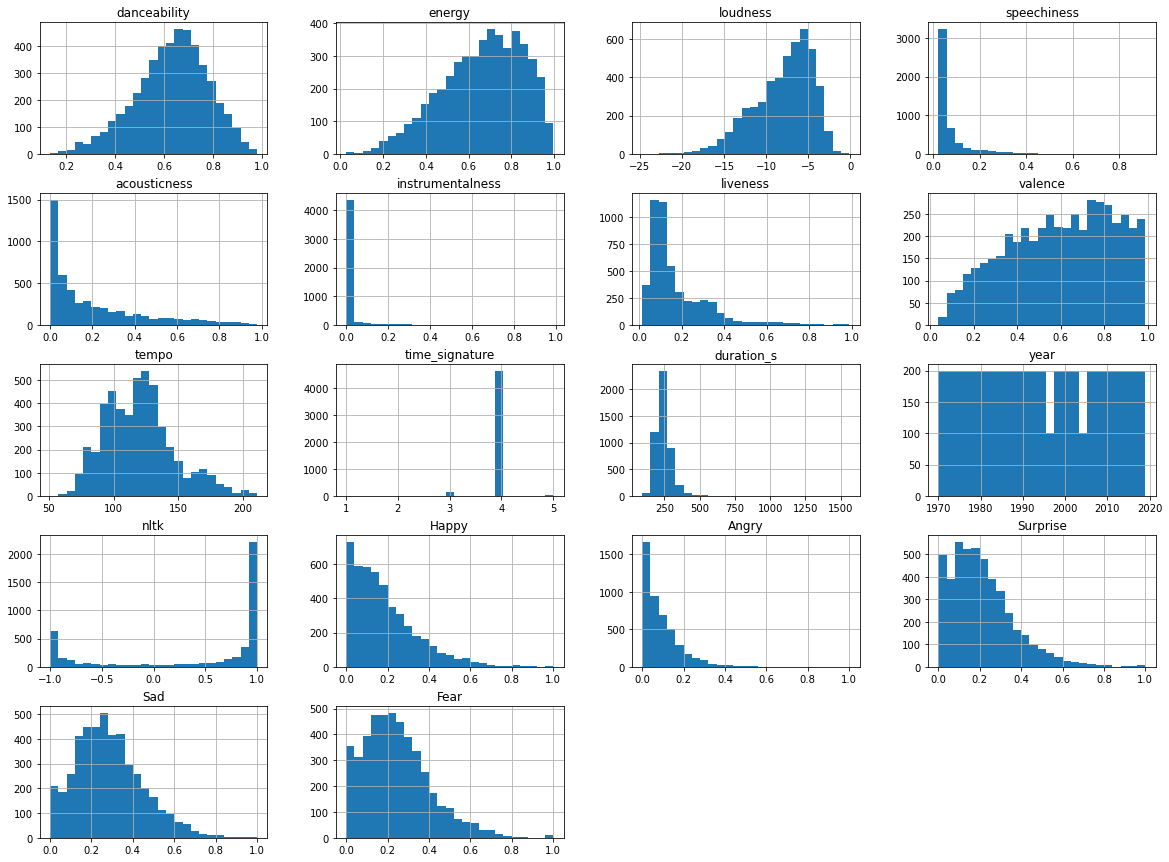

In [9]:
# Histogram to visualize distribution of each feature
songs.hist(bins=25,figsize=(20,15))
plt.show()

## **Machine Learning**

### Content-based recommender using songs' lyrics

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [11]:
tfidf = TfidfVectorizer(stop_words='english')

lyrics = songs['lyrics'].dropna()
lyrics.reset_index(drop=True, inplace=True)

# Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(lyrics)

display(tfidf_matrix.shape)

display(tfidf_matrix)

(4628, 21353)

<4628x21353 sparse matrix of type '<class 'numpy.float64'>'
	with 247091 stored elements in Compressed Sparse Row format>

In [12]:
# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [13]:
indices = pd.Series(lyrics.index, index=songs.dropna()['title']).drop_duplicates()

In [14]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]

    # Get the pairwsie similarity scores of all songs
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar ones
    sim_scores = sim_scores[1:11]

    # Get the songs indices
    songs_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar results
    return songs['title'].iloc[songs_indices]

In [15]:
get_recommendations('Easier')

3660                                    Better in Time
3866                      We No Speak Americano (Edit)
3084                 When It's Over - David Kahne Main
1366                             Love Is A Battlefield
1444                   If Ever You're in My Arms Again
3131    The Ketchup Song (Aserejé) - Spanglish Version
2793                                       He Got Game
2156                                      Motownphilly
2898                                    I Need to Know
4424                                          Heathens
Name: title, dtype: object

### Content-based recommender using songs's features

In [17]:
from sklearn import preprocessing
from sklearn.cluster import KMeans
# from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl
from yellowbrick.cluster import KElbowVisualizer

df = songs.drop(['title', 'primary_artist','key','mode','genres','lyrics','duration_s'], axis=1)
columns = ["danceability", "energy", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "nltk", "Happy", "Angry", "Surprise", "Sad", "Fear"]
df = df[columns]
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,nltk,Happy,Angry,Surprise,Sad,Fear
0,0.443,0.403,-8.339,0.0322,0.6310,0.000000,0.1110,0.4100,143.462,0.9856,0.00,0.35,0.00,0.05,0.60
1,0.755,0.876,-8.867,0.0362,0.3570,0.000005,0.2200,0.9540,102.762,0.9716,0.17,0.00,0.17,0.40,0.27
2,0.474,0.473,-11.454,0.0601,0.5450,0.000001,0.0356,0.5610,77.583,0.9271,0.00,0.20,0.30,0.40,0.10
3,0.598,0.797,-6.793,0.0332,0.0424,0.000407,0.0717,0.6220,123.566,0.1280,0.12,0.06,0.47,0.12,0.24
4,0.611,0.470,-9.135,0.0356,0.5790,0.000000,0.5810,0.9700,85.527,0.9091,0.03,0.10,0.03,0.41,0.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4623,0.902,0.839,-9.447,0.2080,0.0933,0.000000,0.1020,0.7270,133.989,-0.9618,0.00,0.00,0.00,0.00,1.00
4624,0.530,0.538,-6.672,0.0335,0.1700,0.000003,0.2480,0.2880,148.051,-0.7753,0.09,0.36,0.09,0.27,0.18
4625,0.847,0.678,-8.635,0.1090,0.0669,0.000000,0.2740,0.8110,97.984,0.9853,0.33,0.00,0.06,0.33,0.28
4626,0.562,0.460,-4.173,0.2590,0.4760,0.000000,0.1070,0.6230,176.055,0.9900,0.29,0.29,0.00,0.21,0.21


In [18]:
from itertools import permutations

perm = permutations(columns, 3)
output = set(map(lambda x: tuple(sorted(x)),perm))

column_names = ["features", "score", "elbow"]
df2 = pd.DataFrame(columns = column_names)

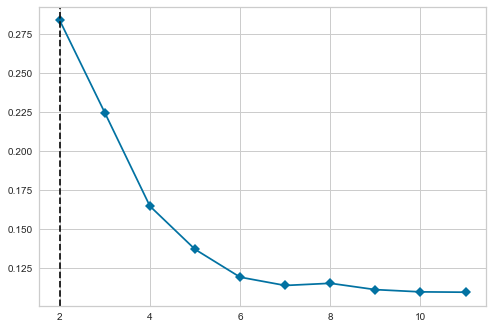

In [35]:
# # Testing Setup
# x = df.values
# min_max_scaler = preprocessing.MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(x)
# # Remove the rows with nan values
# x_scaled = x_scaled[~np.isnan(x_scaled).any(axis=1)]
# df = pd.DataFrame(x_scaled)

# # Testing
# model = KMeans(random_state=0)
# visualizer = KElbowVisualizer(model, k=(2,12), metric='silhouette', timings=False)
# visualizer.fit(x_scaled)
# score = visualizer.elbow_score_
# value = visualizer.elbow_value_

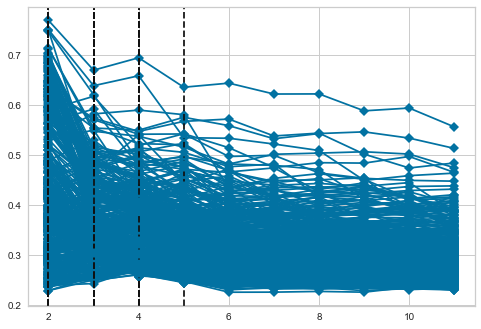

In [19]:
for i in list(output):
    try:
        df1 = df[[ i[0], i[1], i[2] ]]
        x = df1.values 
        min_max_scaler = preprocessing.MinMaxScaler()
        x_scaled = min_max_scaler.fit_transform(x)

        model = KMeans(random_state=0)
        visualizer = KElbowVisualizer(model, k=(2,12), metric='silhouette', timings=False)
        visualizer.fit(x_scaled)

        score = visualizer.elbow_score_
        value = visualizer.elbow_value_
        if score > 0.5:
            # visualizer.show()
            idx = df1.columns
            mylist = idx.tolist()
            dict = {
                "features": mylist,
                "score": score,
                "elbow": value
            }
            df2 = df2.append(dict, ignore_index=True)
    except: 
        print("Input error")

In [21]:
# with open('./data/elbow_cluster_permutations.csv', 'w', encoding='utf-8') as f:
#         df2.to_csv(f, header= True, index=False)

In [49]:
display(df2.sort_values(by='elbow', ascending=False))

,features,score,elbow
0,"[instrumentalness, liveness, nltk]",0.71243,2
1,"[Surprise, instrumentalness, nltk]",0.692823,2
2,"[acousticness, instrumentalness, nltk]",0.631296,2
3,"[Happy, Sad, nltk]",0.632251,2
4,"[nltk, tempo, valence]",0.545176,2
...,...,...,...
103,"[Surprise, loudness, nltk]",0.643759,2
104,"[acousticness, loudness, nltk]",0.595486,2
105,"[loudness, nltk, valence]",0.561607,2
106,"[Happy, loudness, nltk]",0.647649,2


In [42]:
kmeans = KMeans(init="k-means++",
                n_clusters=2,
                random_state=15,
                max_iter = 500).fit(x_scaled)
df1['kmeans'] = kmeans.labels_
df1.columns = ['instrumentalness', 'nltk', 'speechiness', 'kmeans']

In [34]:
df1

,instrumentalness,nltk,speechiness,kmeans
0,0.35,0.443,0.0322,1
1,0.00,0.755,0.0362,0
2,0.20,0.474,0.0601,1
3,0.06,0.598,0.0332,1
4,0.10,0.611,0.0356,1
...,...,...,...,...
4623,0.00,0.902,0.2080,0
4624,0.36,0.530,0.0335,1
4625,0.00,0.847,0.1090,0
4626,0.29,0.562,0.2590,1


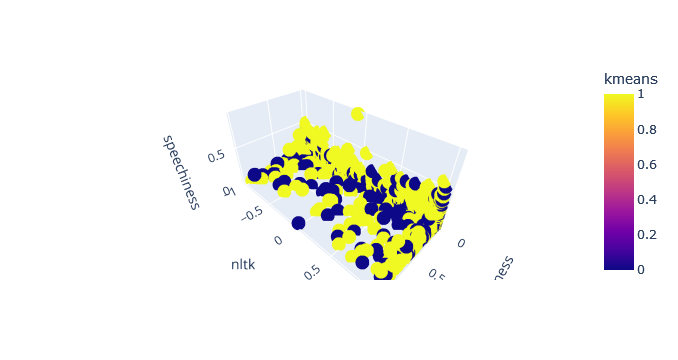

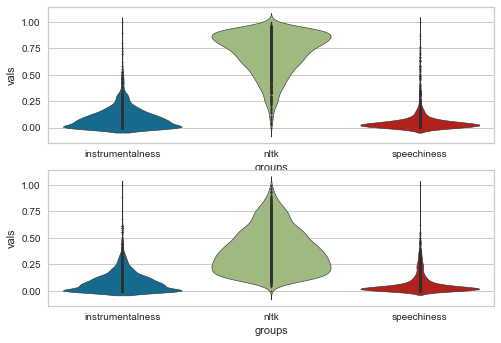

In [41]:
import plotly.express as px

kmeans = df1['kmeans']
df['kmeans'] = kmeans

fig = px.scatter_3d(df, x='instrumentalness', y='nltk', z='speechiness',
              color='kmeans')
fig.show()

# Violin Plot for each cluster 
c0 = df1[df1['kmeans']==0]
c1 = df1[df1['kmeans']==1]

c0.drop(['kmeans'], axis=1, inplace=True)
c1.drop(['kmeans'], axis=1, inplace=True)

x = c0.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
c0_scaled = min_max_scaler.fit_transform(x)
c0 = pd.DataFrame(c0_scaled)
c0.columns = ['instrumentalness', 'nltk', 'speechiness']
c0=c0.melt(var_name='groups', value_name='vals')

x = c1.values 
min_max_scaler = preprocessing.MinMaxScaler()
c1_scaled = min_max_scaler.fit_transform(x)
c1 = pd.DataFrame(c1_scaled)
c1.columns = ['instrumentalness', 'nltk', 'speechiness']
c1=c1.melt(var_name='groups', value_name='vals')

f, axes = plt.subplots(2, 1)
ax = sns.violinplot( data=c0 ,x="groups", y="vals", linewidth = 0.6, inner = 'point', scale= 'width', ax=axes[0])
ax = sns.violinplot( data=c1 ,x="groups", y="vals", linewidth = 0.6, inner = 'point', scale= 'width', ax=axes[1])

plt.show()

In [ ]:
### Clustering on all 15 features

In [45]:
df = songs.drop(['title', 'primary_artist','key','mode','genres','lyrics','duration_s'], axis=1)
columns = ["danceability", "energy", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "nltk", "Happy", "Angry", "Surprise", "Sad", "Fear"]
df = df[columns]
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,nltk,Happy,Angry,Surprise,Sad,Fear
0,0.443,0.403,-8.339,0.0322,0.6310,0.000000,0.1110,0.4100,143.462,0.9856,0.00,0.35,0.00,0.05,0.60
1,0.755,0.876,-8.867,0.0362,0.3570,0.000005,0.2200,0.9540,102.762,0.9716,0.17,0.00,0.17,0.40,0.27
2,0.474,0.473,-11.454,0.0601,0.5450,0.000001,0.0356,0.5610,77.583,0.9271,0.00,0.20,0.30,0.40,0.10
3,0.598,0.797,-6.793,0.0332,0.0424,0.000407,0.0717,0.6220,123.566,0.1280,0.12,0.06,0.47,0.12,0.24
4,0.611,0.470,-9.135,0.0356,0.5790,0.000000,0.5810,0.9700,85.527,0.9091,0.03,0.10,0.03,0.41,0.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4623,0.902,0.839,-9.447,0.2080,0.0933,0.000000,0.1020,0.7270,133.989,-0.9618,0.00,0.00,0.00,0.00,1.00
4624,0.530,0.538,-6.672,0.0335,0.1700,0.000003,0.2480,0.2880,148.051,-0.7753,0.09,0.36,0.09,0.27,0.18
4625,0.847,0.678,-8.635,0.1090,0.0669,0.000000,0.2740,0.8110,97.984,0.9853,0.33,0.00,0.06,0.33,0.28
4626,0.562,0.460,-4.173,0.2590,0.4760,0.000000,0.1070,0.6230,176.055,0.9900,0.29,0.29,0.00,0.21,0.21


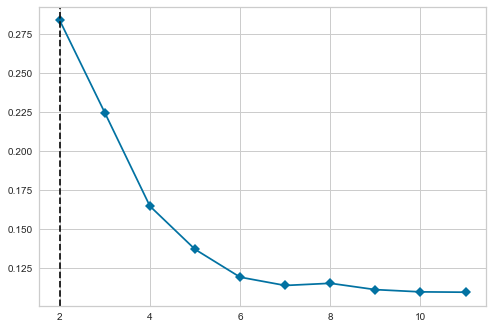

In [46]:
x = df.values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k=(2,12), metric='silhouette', timings=False)
visualizer.fit(x_scaled)

score = visualizer.elbow_score_
value = visualizer.elbow_value_

In [66]:
clustering_kmeans = KMeans(n_clusters=2, random_state=0)
df['clusters'] = clustering_kmeans.fit_predict(df)

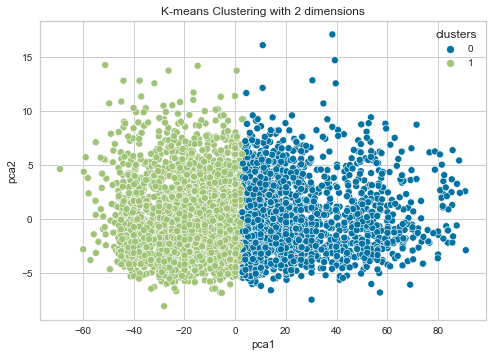

In [67]:
### Run PCA on the data and reduce the dimensions in pca_num_components dimensions
from sklearn.decomposition import PCA
pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(df)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=df['clusters'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

### Keras for NLP

In [68]:
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.layers import Dense, Embedding, LSTM, GRU, Bidirectional
from keras.models import Sequential
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

In [28]:
xData = []
stop_words = set(stopwords.words('english'))
translator = str.maketrans('', '', string.punctuation)

for lyric in songs['lyrics']:
    if type(lyric) is not float:
        # Tokenized lyrics into individual words. 
        tokens = word_tokenize(lyric)
        tokens = [word.lower() for word in tokens]

        # Punctuation was removed and letters were changed to lower case. 
        tokens_nopunc = [word.translate(translator) for word in tokens]

        # Remove non-alphabetic tokens
        words = [word for word in tokens_nopunc if word.isalpha()]

        # Remove stop words from the lyric
        words = [word for word in words if not word in stop_words]

        # Append to training data
        xData.append(words)

In [ ]:
tokenizer = Tokenizer()
lyrics_list = songs['lyrics'].to_list()
corpus = " ".join(map(str,lyrics_list))
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# print(tokenizer.word_index)
# print(total_words)

In [ ]:
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[: i+1]
        input_sequences.append(n_gram_sequence)

In [ ]:
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

In [ ]:
xs, labels = input_sequences[:, :-1], input_sequences[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [ ]:
model = Sequential()
model.add(Embedding(total_words, 64, input_length = max_sequence_len-1))
model.add(Bidirectional(LSTM(20)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(xs, ys, epochs=500, verbose=1)